In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Contour plot function

In [49]:

def contourPlot(f, x_val, ax, sizex, sizey, fig):
    xv=np.linspace(-sizex,sizex,30)
    yv=np.linspace(-sizey,sizey,30)
    xx, yy = np.meshgrid(xv, yv)
    #the element in position xx[i, j] is the x-coordinate of the intersection i, j into the grid

    #compute the value of f over the grid
    zz=f((xx, yy))
    #plot conrour plot
    cont=ax.contour(xx, yy, zz, levels=10, corner_mask=True)
    #fig.colorbar(cont)
    plt.title("contour plot")
    ax.plot(x_val[0,1:], x_val[1,1:], "o-")


## BACKTRACKING algorithm

In [63]:
def backtracking(f, grad_f, x,):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha

def backtracking_vander(f, grad_f, x,A, b, l=1):
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x,A,b,l), A, b, l) > f(x, A, b, l) - c * alpha * np.linalg.norm(grad_f(x,A,b,l)) ** 2:
        alpha = tau * alpha

        if alpha < 1e-3:
            break
    return alpha

## GRADIENT DESCENT
implement gradient descent algorithm with following parameters:
loss function (f), its gradient, strarting guess, two stopping criterions (tolf and tolx), and max number of iterations (kmax).
As outputs we want:
- x -> stationary point
- f_val -> the vector containing the values of f during the iterations
- err_vall -> vector containing the values of $||grad_f(x, k)||$

For these examples, I always set $x_0=0$

In [68]:
def GD(f, grad_f, x0, tolf, tolx, kmax):
    #initialization
    a=1 #stepsize
    f_val=np.zeros((kmax,))
    err_val=np.zeros((kmax,))
    #if(x_val.shape)
    x_val=[]
    x_val.append(x0)
    #iterations
    k=0
    conditions=True
    while (conditions):
        #update a
        if(k!=0):
            a=backtracking(f, grad_f, x)
        #update x
        x=x0-a*grad_f(x0)
        #store values
        f_val[k]=f(x)
        err_val[k]=np.linalg.norm(grad_f(x))
        x_val.append(x)
        #update k
        k+=1
        #update conditions
        stopcond1=np.linalg.norm(grad_f(x)) > tolf*np.linalg.norm(grad_f(x_val[0])) 
        stopcond2=np.linalg.norm(x-x0) > tolx*np.linalg.norm(x_val[0])
        conditions=k<kmax-1 and stopcond1 and stopcond2
        #restart
        x0=x
    #truncate vectors -> not mandatory (visualization purposes in case of convergence in k 
    f_val=f_val[:k]
    err_val=err_val[:k]
    return x_val, f_val, err_val

#same gradient descent function but for vander matrices
def GD_vander(f, grad_f, x0, tolf, tolx, kmax, A, b, l=1):
    #initialization
    a=1 #stepsize
    f_val=np.zeros((kmax,))
    err_val=np.zeros((kmax,))
    #if(x_val.shape)
    x_val=[]
    x_val.append(x0)
    #iterations
    k=0
    conditions=True
    while (conditions):
        #update a
        if(k!=0):
            a=backtracking_vander(f, grad_f, x, A, b, l)
        #update x
        x=x0-a*grad_f(x0, A, b, l)
        #store values
        f_val[k]=f(x, A, b, l)
        err_val[k]=np.linalg.norm(grad_f(x, A, b, l))
        x_val.append(x)
        #update k
        k+=1
        #update conditions
        stopcond1=np.linalg.norm(grad_f(x, A, b, l)) > tolf*np.linalg.norm(grad_f(x_val[0], A, b, l)) 
        stopcond2=np.linalg.norm(x-x0) > tolx*np.linalg.norm(x_val[0])
        conditions=k<kmax-1 and stopcond1 and stopcond2
        #restart
        x0=x
    #truncate vectors -> not mandatory (visualization purposes in case of convergence in k 
    f_val=f_val[:k]
    err_val=err_val[:k]
    return x_val, f_val, err_val


1) Gradient descent for: $$f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$$
Whose gradient is: $(2x_1 -6, 2x_2-2)$

final value:[3.00289428 1.00096476]
(54, 2)


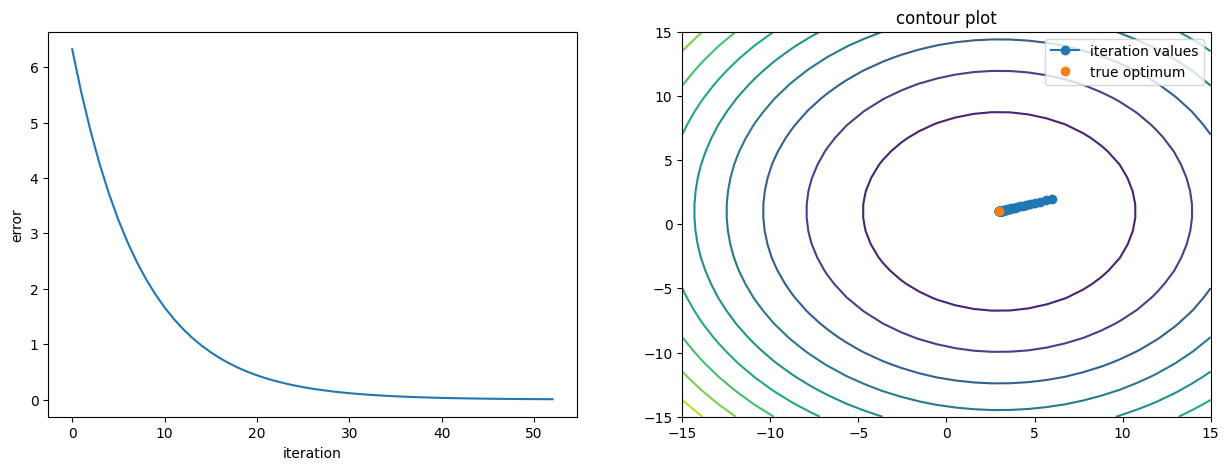

In [52]:
def f1(x):
    res=(x[0]-3)**2 + (x[1]-1)**2
    return res
def grad_f1(x):
    return np.array((2*x[0] -6, 2*x[1]-2))

x0=np.array((0,0))
#print(x0.shape)
x_val, f_val, err_val=GD(f1, grad_f1, x0, 1e-3, 1e-3, kmax=500)
print(f"final value:{x_val[-1]}")
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))
ax1.plot(err_val)
ax1.set_xlabel("iteration")
ax1.set_ylabel("error")
x_val=np.array(x_val)
print(x_val.shape)
contourPlot(f1, x_val.T, ax2, sizex=15, sizey=15, fig=fig)
ax2.plot(3,1, "o")
plt.legend(["iteration values", "true optimum"])


2) Gradient descent for: $$f(x_1, x_2) = 10(x_1 − 1)^2 + (x_2 − 2)^2$$
Whose gradient is: $(20x_1 -20, 2x_2-4)$

final value:[1.00000025 1.75179172]


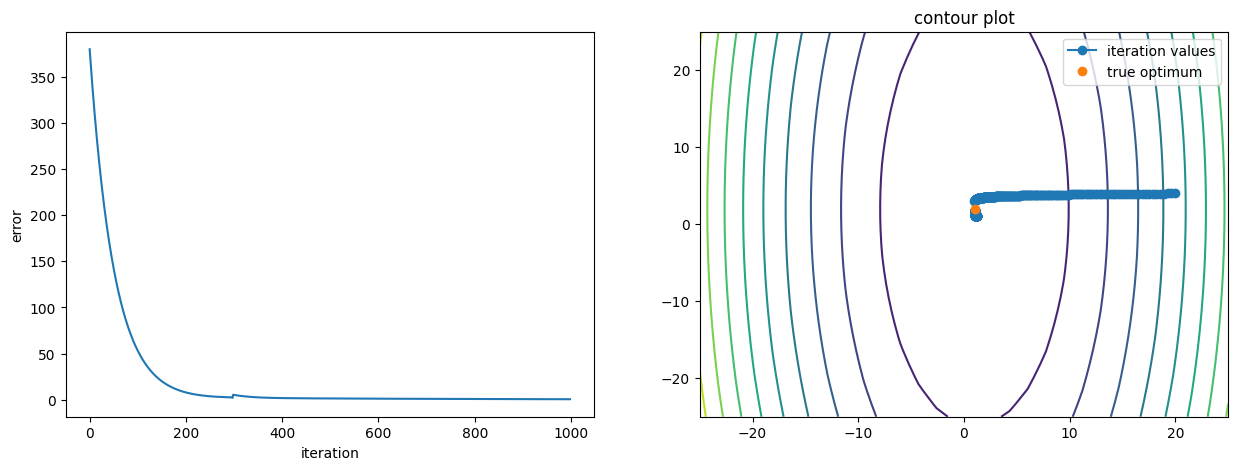

In [53]:
def f2(x):
    res=10*(x[0]-1)**2 + (x[1]-2)**2
    return res
def grad_f1(x):
    return np.array((20*x[0] -20, 2*x[1]-4))

x0=np.array((0,0))
x_val2, f_val, err_val2=GD(f1, grad_f1, x0, 1e-2, 1e-2, 1000)
print(f"final value:{x_val2[-1]}")
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))
ax1.plot(err_val2)
ax1.set_xlabel("iteration")
ax1.set_ylabel("error")
x_val2=np.array(x_val2)
contourPlot(f2, x_val2.T, ax2, sizex=25, sizey=25, fig=fig)
ax2.plot(1,2, "o")
plt.legend(["iteration values", "true optimum"])

3) Gradient descent for: $$f(x) = 1/2 *||Ax − b||_2^2$$
where $A ∈ R^{n×n}$ is the Vandermonde matrix associated with the vector $v ∈ R^n$ that contains n equispaced values in the interval [0, 1],<br> 
and $b ∈ R^n$ is computed by first setting xtrue=(1, 1, . . . , 1)T and then b = Axtrue.<br> 
Try for different values of n (e.g. n = 5, 10, 15, . . .).


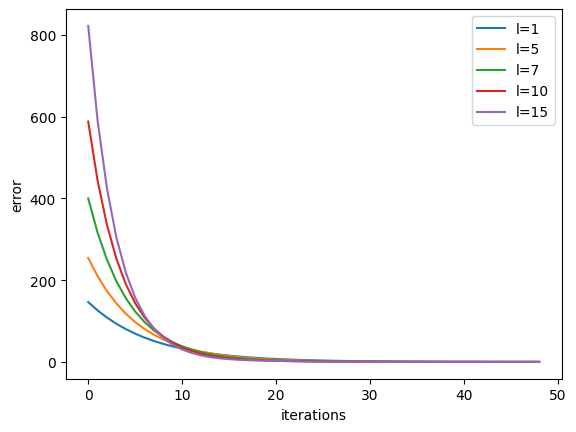

In [83]:
def f3(x,A,b, l=1):
    res=0.5*np.linalg.norm(A@x-b)**2
    return res
def grad_f3(x,A,b, l=1):
    return (A@x-b).T@A

#create vander matrix based on x_vander={1,2,3,...,n}
def vander(n):
    v=np.linspace(0,1,n)
    A=np.vander(v, n)
    #calculating b from x_true
    x_true=np.ones((n,))
    b=x_true@A

    #calculating x
    x=np.linalg.solve(A,b)
    return A, b, x

n_val=[1,5,7,10,15,20,50]
for n in range(5,10):
    A, b, x=vander(n)
    x0=np.zeros((n,))
    x_val3, f_val, err_val3=GD_vander(f3, grad_f3, x0, 1e-3, 1e-3, 50, A, b)
    #print(f"final value:{x_val3[-1]}")
    plt.plot(err_val3)
plt.xlabel("iterations")
plt.ylabel("error")
legend=["l="+str(i) for i in n_val]
plt.legend(legend)

4) Gradient descent for: $$f(x) = 1/2 *||Ax − b||_2^2 + λ/2 *||x||_2^2$$
where A and b are the same of the exercise above, while λ is a fixed value in the interval [0, 1].<br>
Try different values for λ.

Text(0.5, 1.0, 'GD of R^n -> R with regularization (n=10)')

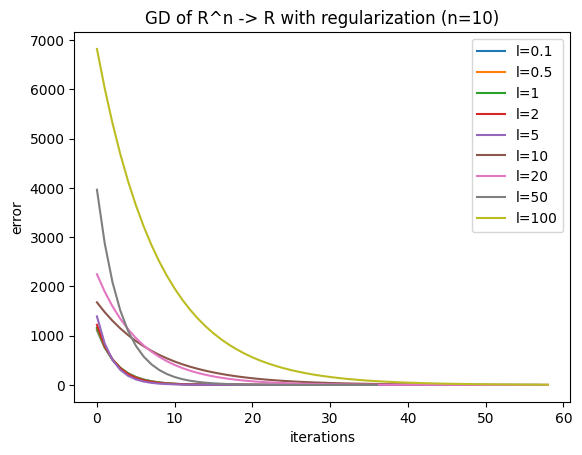

In [87]:
def f4(x,A,b, l):
    res=0.5*np.linalg.norm(A@x-b)**2 + (l/2)*np.linalg.norm(x)**2
    return res
def grad_f4(x,A,b, l):
    return (A@x-b).T@A + l*x

n=10
plt.xlabel("iterations")
plt.ylabel("error")
l_val=[0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]
for i in l_val:
    l=i
    A, b, x=vander(n)
    x0=np.zeros((n,))
    x_val4, f_val, err_val4=GD_vander(f4, grad_f4, x0, 1e-3, 1e-3, 60, A, b, l)
    #print(f"final value:{x_val4[-1]}")
    plt.plot(err_val4)
legend=["l="+str(i) for i in l_val]
plt.legend(legend)
plt.title("GD of R^n -> R with regularization (n=10)")

5) Gradient descent for: $$f(x) = x^4+x^3-2x^2-2x$$
<br>

[0.9223191]


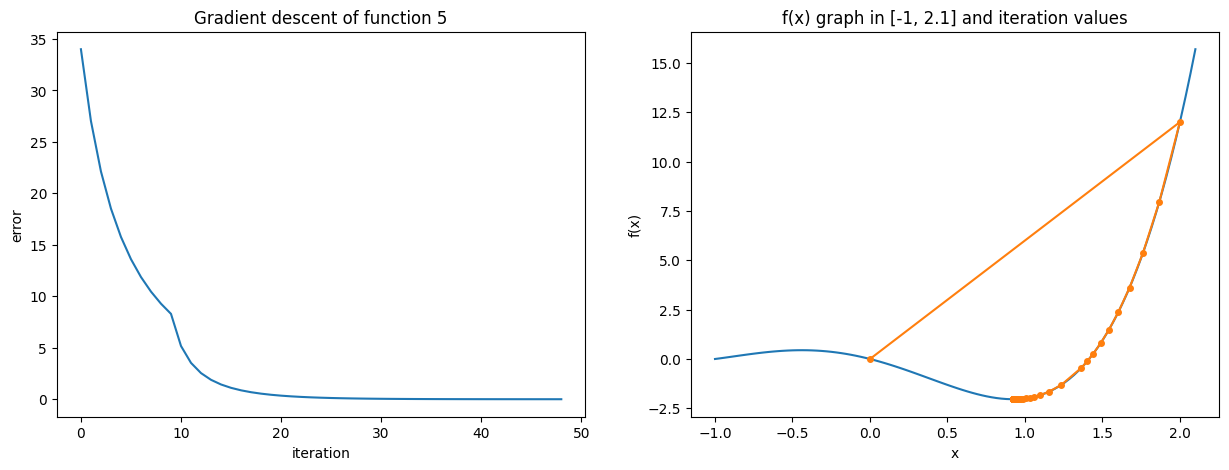

In [157]:
#fifth function
def f5(x):
    res=x**4+x**3-2*x**2-2*x
    return res
def grad_f5(x):
    return 4*x**3+3*x**2-4*x-2

x0=np.array((0,))
x_val5, f_val5, err_val5=GD(f5, grad_f5, x0, 1e-6, 1e-6, 50)
x_val5=np.array(x_val5)

fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15,5))
ax1.plot(err_val5)
ax1.set_xlabel("iteration")
ax1.set_ylabel("error")
ax1.set_title("Gradient descent of function 5")
plt.xlabel("iterations")
plt.ylabel("error")

x=np.linspace(-1,2.1,100)
ax2.plot(x, f5(x))
ax2.plot(x_val5, f5(x_val5), "o-", markersize=4)
ax2.set_title("f(x) graph in [-1, 2.1] and iteration values")
ax2.set_xlabel("x")
ax2.set_ylabel("f(x)")
print(x_val5[-1])